In [25]:
%load_ext autoreload
%autoreload 2

import torch
from invertible_network_utils import construct_invertible_mlp


import matplotlib.pyplot as plt
from simclr.simclr import SimCLR
from spaces import NSphereSpace

from visualization_utils.spheres import visualize_spheres_side_by_side, scatter3d_sphere

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Using', device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using cuda


condition number threshold: 2.899491
layer 1/3,  condition number: 2.7508647517711613
layer 2/3,  condition number: 2.700385774991923
layer 3/3,  condition number: 2.204525180107384
MAX NORM: tensor(1.0092)


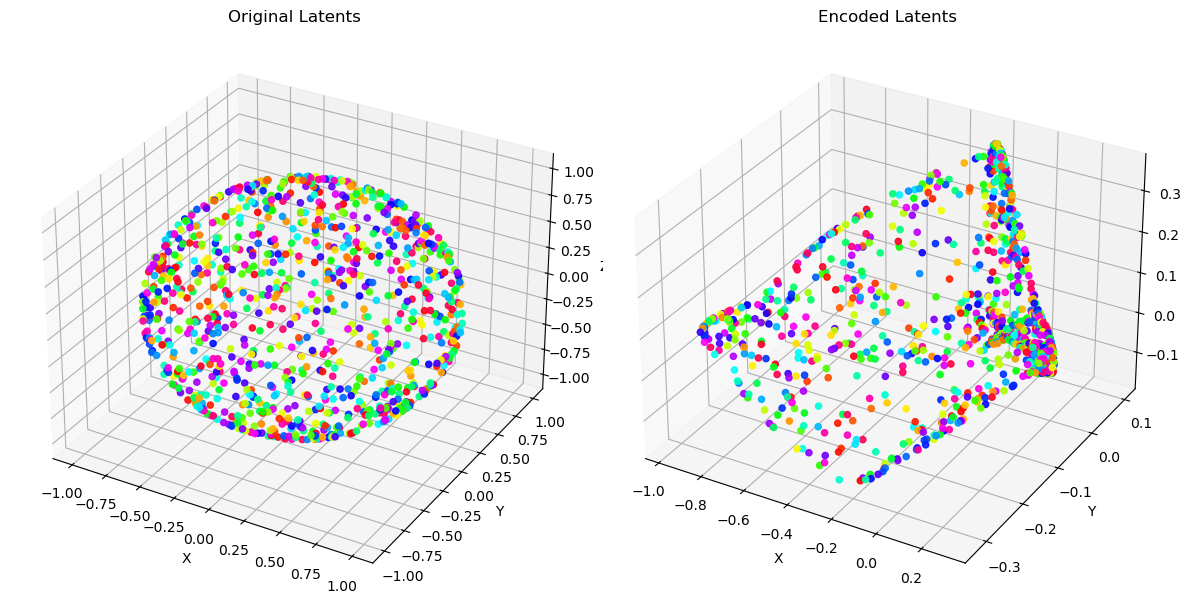

In [26]:
sphere = NSphereSpace(3)
g_mlp = construct_invertible_mlp(n=3, n_layers=3, act_fct="leaky_relu")

z = sphere.uniform(1000)

print('MAX NORM:',(g_mlp(z) ** 2).sum(dim=1).max())

visualize_spheres_side_by_side(plt, z, g_mlp(z))

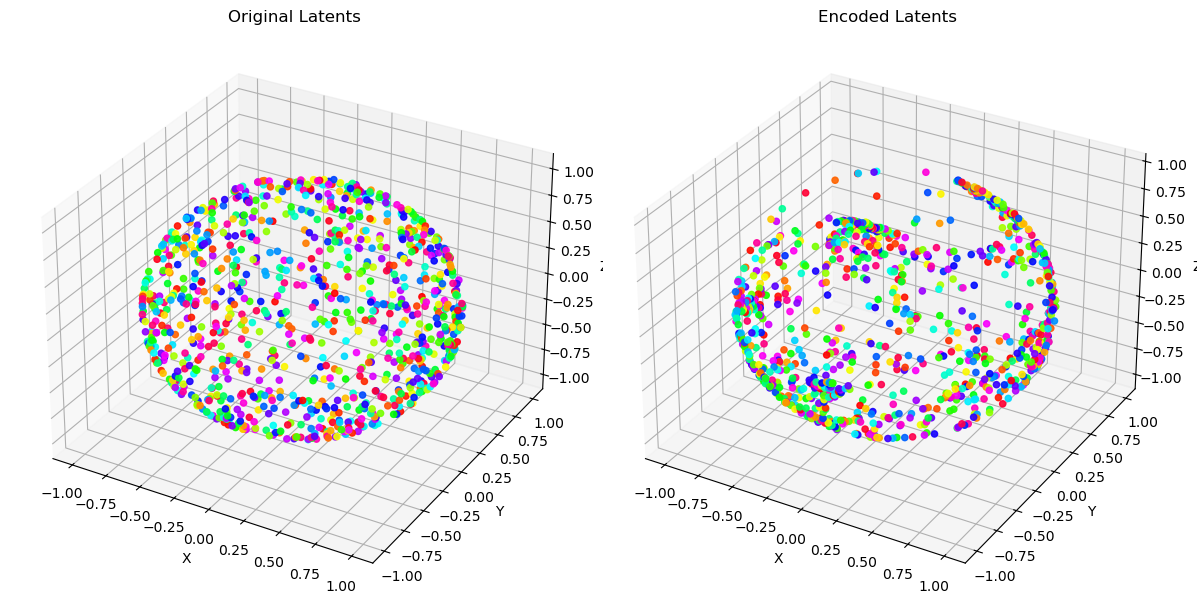

In [28]:
from encoders import SphericalEncoder

tau = 0.3
kappa = 1 / tau

iterations = 10000
batch = 6144

sample_pair_fixed = lambda batch: sphere.sample_pair_vmf(batch, kappa)
sample_uniform_fixed = lambda batch: sphere.uniform(batch)

f = SphericalEncoder()

h = lambda z: f(g_mlp(z))

z = sphere.uniform(1000)
z_enc = h(z)

# Add coloring corresponding to initial points

visualize_spheres_side_by_side(plt, z, z_enc)

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.808704376220703 Samples processed: 1 linear disentanglement: 0.3735746443271637 permutation disentanglement: 0.11361392587423325 angle_preservation_error: 0.24588648974895477
Loss: 8.057703971862793 Samples processed: 21 linear disentanglement: 0.9020578265190125 permutation disentanglement: 0.13963980972766876 angle_preservation_error: 0.10073546320199966
Loss: 7.949525356292725 Samples processed: 41 linear disentanglement: 0.9519339203834534 permutation disentanglement: 0.1649637669324875 angle_preservation_error: 0.06984975934028625
Loss: 7.872100830078125 Samples processed: 61 linear disentanglement: 0.9717674255371094 permutation disentanglement: 0.16070270538330078 angle_preservation_error: 0.05401117727160454
Loss: 7.831532955169678 Samples processed: 81 linear disentanglement: 0.9820072054862976 permutation disentanglement: 0.16867202520370483 angle_preservation_error: 0.04238549619913101
Loss: 7.851245403289795 S

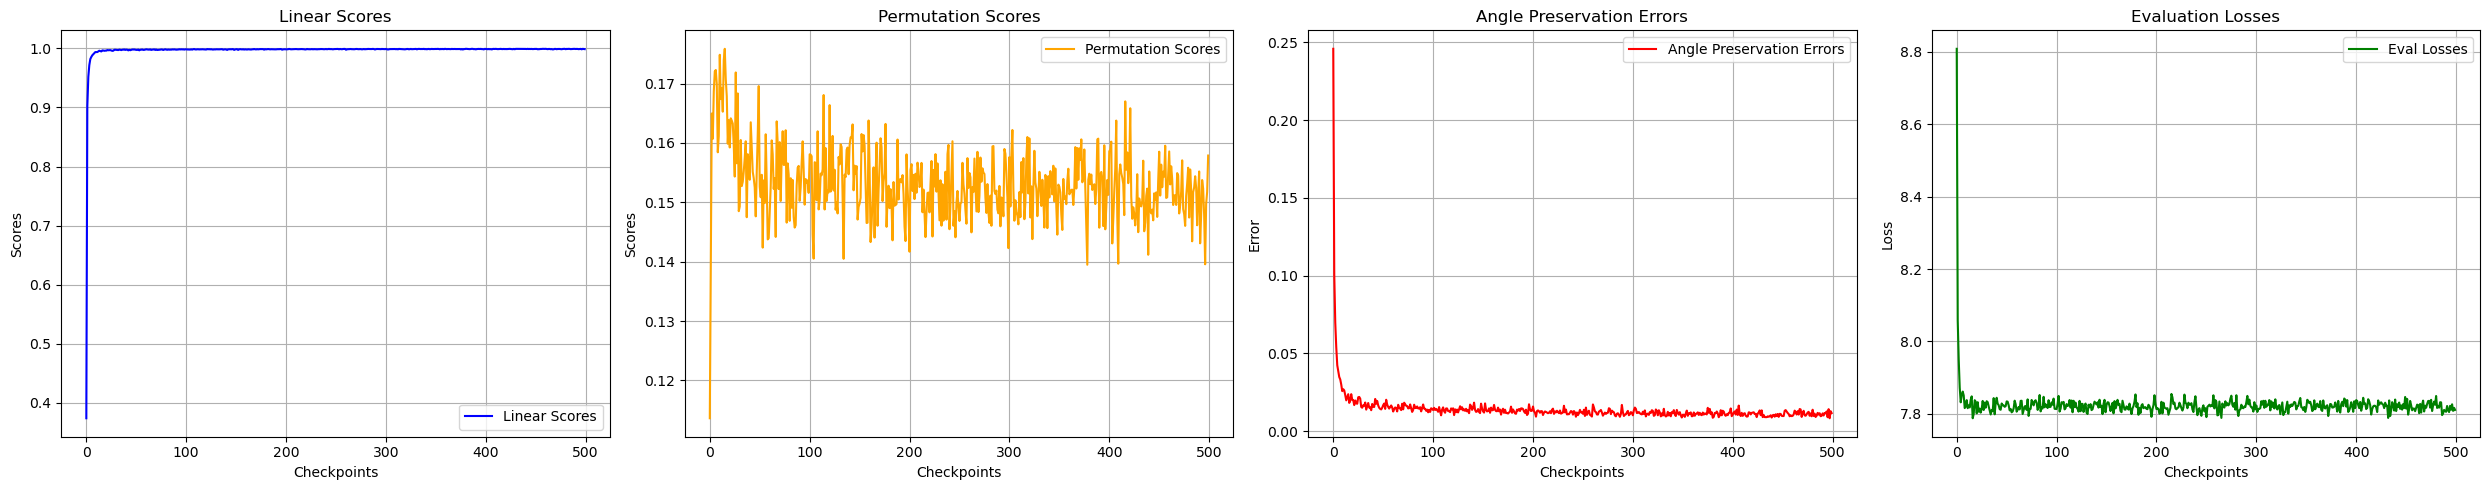

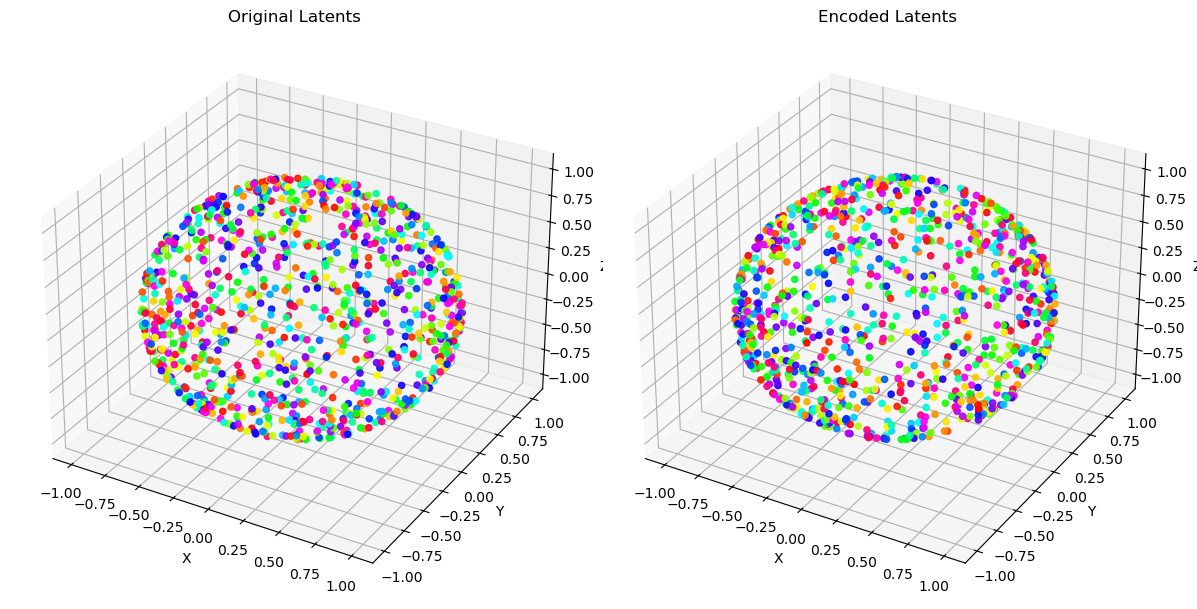

In [29]:
from visualization_utils.scoring import plot_scores

simclr_vmf = SimCLR(
    f, g_mlp, sample_pair_fixed, sample_uniform_fixed, tau, device
)

f, scores = simclr_vmf.train(batch, iterations)

h = lambda z: f(g_mlp(z))

z = sphere.uniform(1000).to(device)
z_enc = h(z).to(device)

plot_scores(plt, scores)
visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())